In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import networkx as nx
import matplotlib.pyplot as plt

## Prepare the input

In [46]:
# Assuming 'df' is your DataFrame
df = pd.read_excel('input/matrix_1_0.xlsx')  # replace 'your_data.csv' with the path to your file
# asiign clustr column as index
df = df.set_index('cluster')

# skip row W5SGU from df
#df = df.drop('VV5SGU', axis=0)

In [28]:
# subset first 100 columns from df
df_sub = df.iloc[:, :100]
# drop rows with all 0
df_sub = df_sub[(df_sub.T != 0).any()]
df_sub

,V00H9L,V010T4,V03HFT,V03ZU2,V0404P,V045JG,V04J9U,V04PTT,V04YHL,V05U4U,...,V23PXU,V247S0,V25RI2,V25ZP5,V26SW4,V27TGZ,V2906Q,V2930P,V296TD,V2A14B
cluster,,,,,,,,,,,,,,,,,,,,,
1XD42-69-V46NG6_metabat.195.fa,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51-20-VQQ90U_vamb.11929.fa,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
Absicoccus-V9LH4H_vamb.5610.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acetatifactor-VFRA8A_metabat.122.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acetatifactor-VHJS50_maxbin.022.fa,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wujia-VUV3QJ_vamb.187099.fa,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
Zag111-V08XFS_vamb.82229.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zag111-V0X1YJ_metabat.38.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# suset only rows with row sum > 200
df_sub2 = df[df.sum(axis=1) < 50]
# drop columns with all 0
df_sub2 = df_sub2.loc[:, (df_sub2 != 0).any(axis=0)]
df_sub2

,V00H9L,V010T4,V03HFT,V03ZU2,V0404P,V045JG,V04J9U,V04PTT,V04YHL,V05U4U,...,VZR2LZ,VZR42V,VZSPJW,VZSQ0C,VZTMOW,VZUFR8,VZWEWM,VZXIHP,VZY957,VZZW6V
cluster,,,,,,,,,,,,,,,,,,,,,
14-2-VDFRDM_metabat.13.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14-2-VLB6XN_256644.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1XD42-69-V46NG6_metabat.195.fa,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43-108-VUXZVX_metabat.11.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Absicoccus-V9LH4H_vamb.5610.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zag111-VSMZLQ_vamb.253101.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zag111-VUZJOJ_vamb.34635.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zag111-VVRBSV_vamb.2831.fa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Samples nodes

In [42]:
# Transpose the DataFrame to get samples as rows
df = df_sub2.T

# Create an empty Graph
G = nx.Graph()

# Add nodes for each sample
for sample in df.index:
    G.add_node(sample)

# Add edges between samples that share at least one bacteria
for sample1 in df.index:
    for sample2 in df.index:
        if sample1 != sample2:
            # If there is any overlap in the bacteria present in both samples
            if any(df.loc[sample1] & df.loc[sample2]):
                G.add_edge(sample1, sample2)

In [45]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

## Bacteria nodes

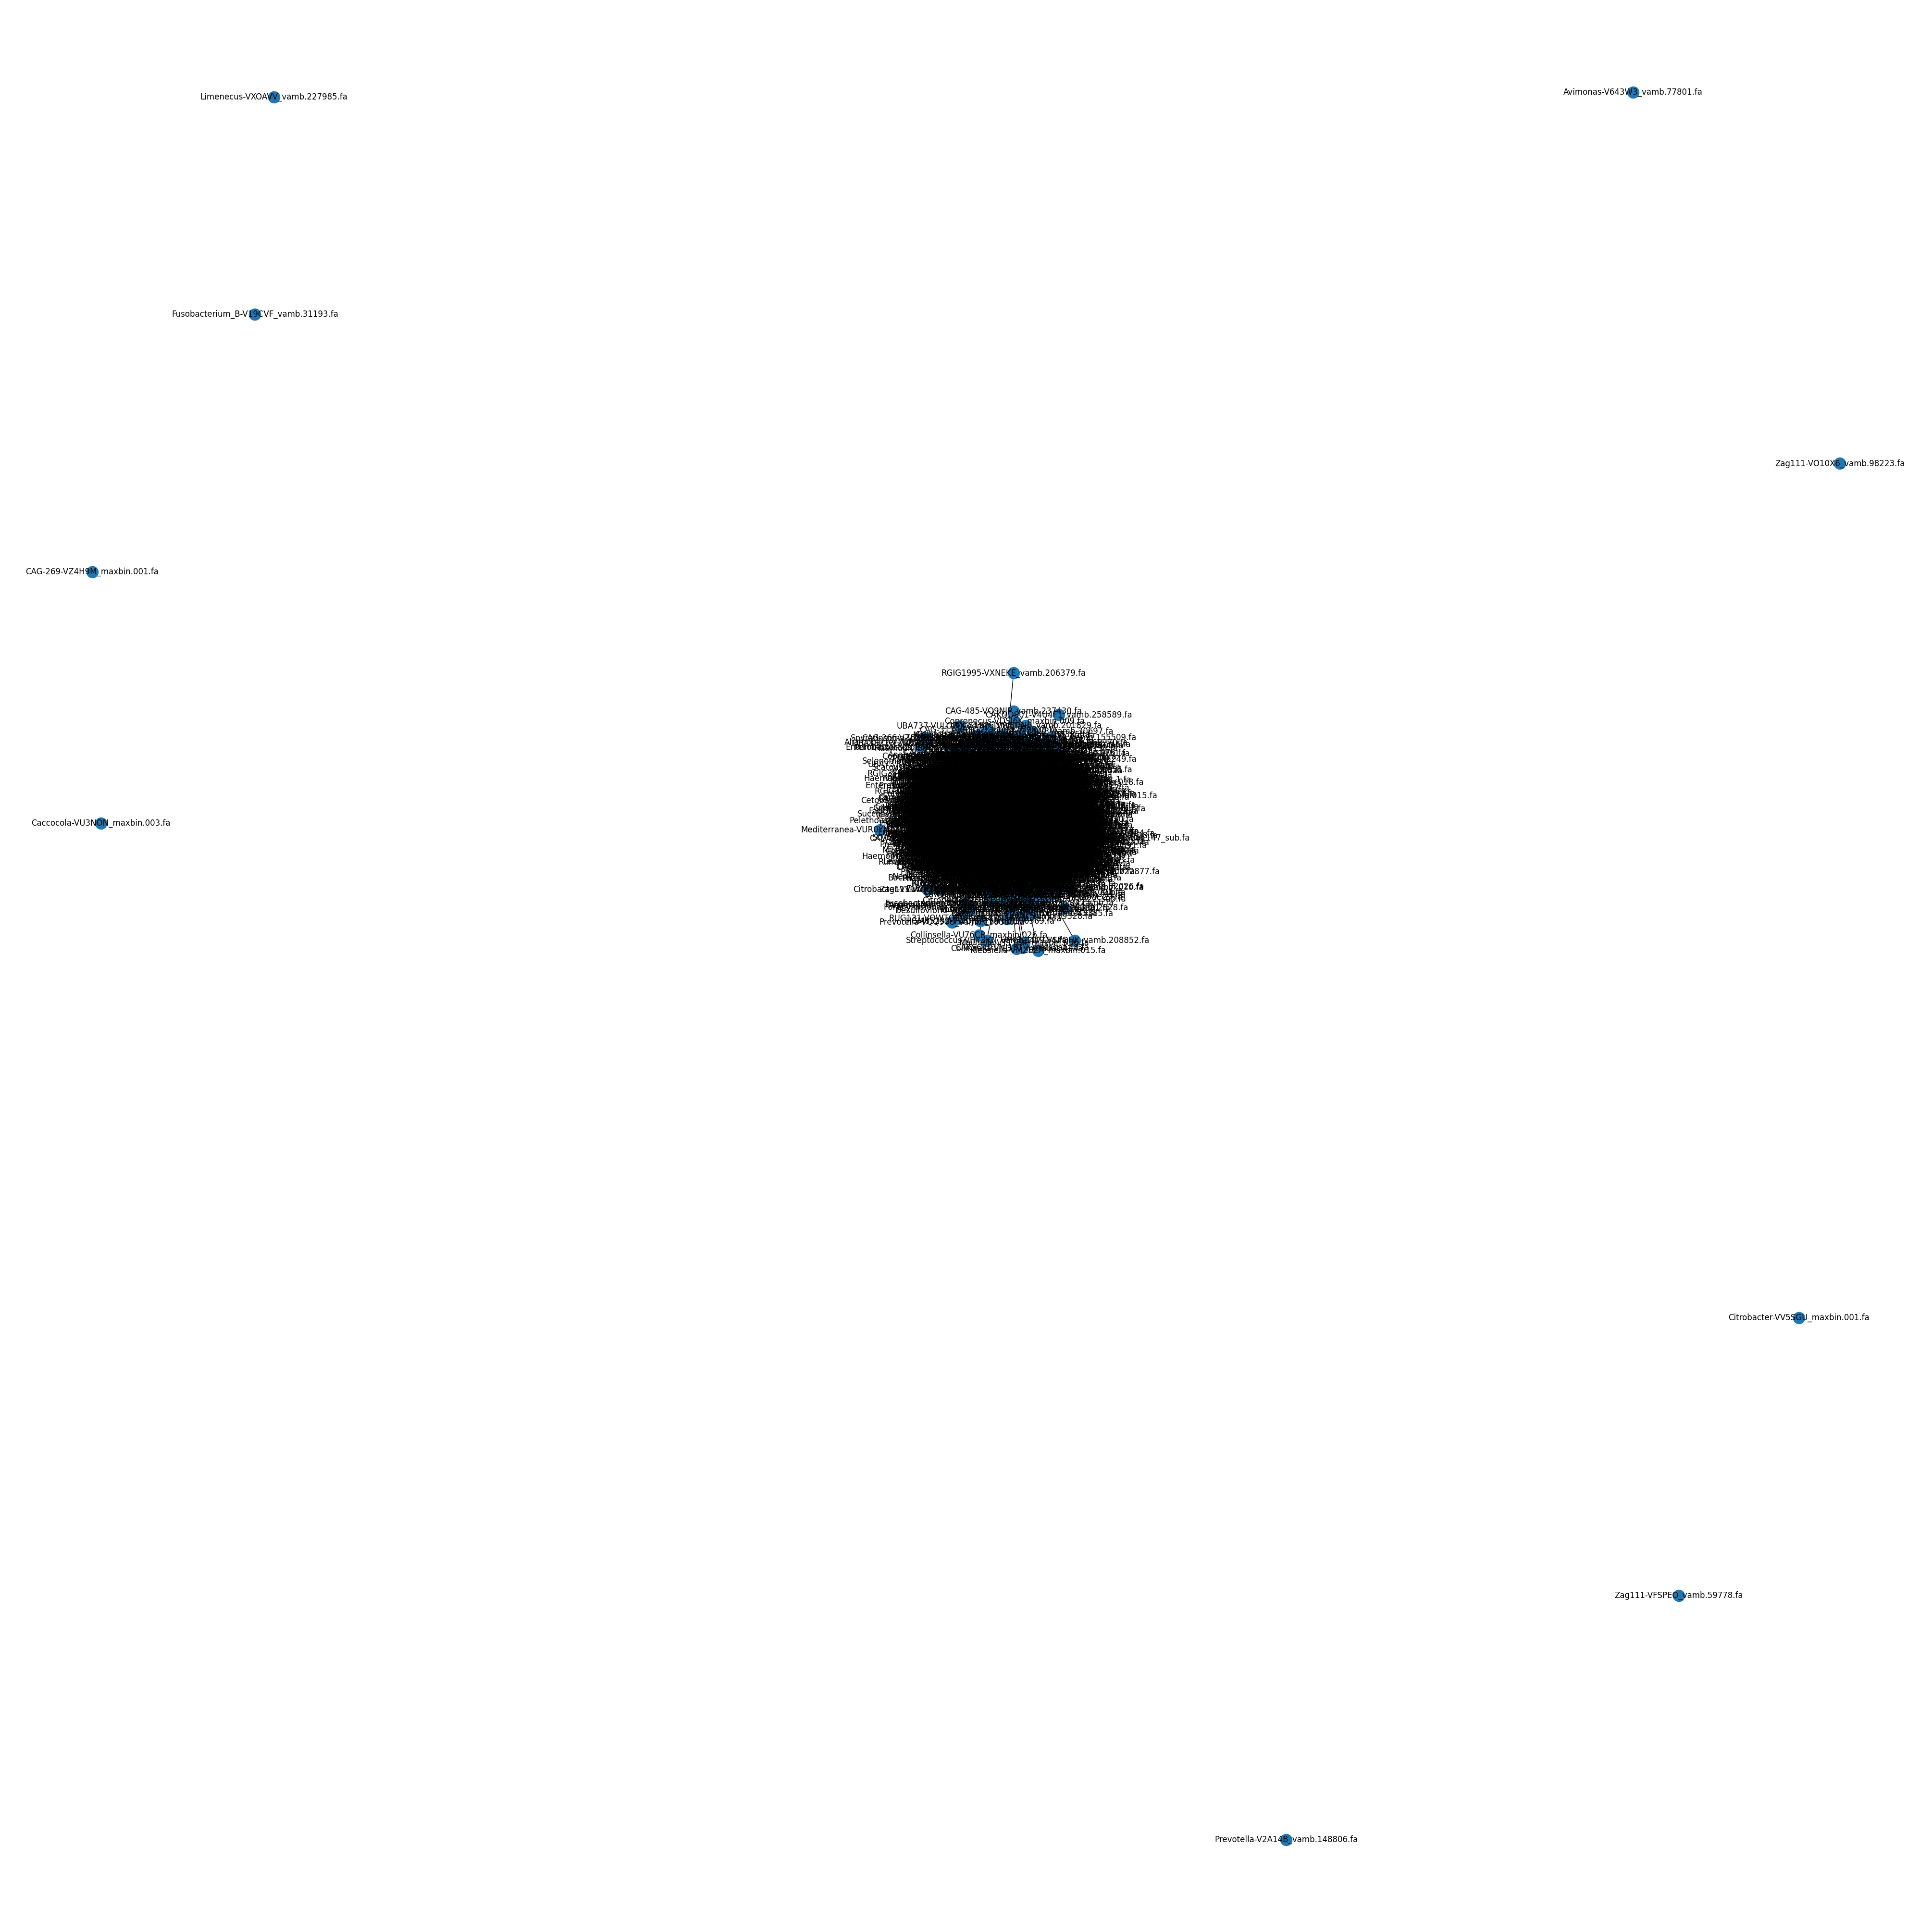

In [51]:
dfB = df_sub2

# Create an empty Graph
G = nx.Graph()

# Add nodes for each bacteria
for bacteria in dfB.index:
    G.add_node(bacteria)

# Add edges between bacteria that share at least one sample
for bacteria1 in dfB.index:
    for bacteria2 in dfB.index:
        if bacteria1 != bacteria2:
            # If there is any overlap in the samples where the bacteria are present
            if any(dfB.loc[bacteria1] & dfB.loc[bacteria2]):
                G.add_edge(bacteria1, bacteria2)

# Set the figure size
plt.figure(figsize=(40, 40))

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()
